In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import sys
sys.path.append('../../')

import tensorflow as tf
# tf.enable_eager_execution()
from tensorflow import gfile
import numpy as np
from tgs import data
import time
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True,linewidth=np.nan,threshold=np.nan)

/home/jfaath/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jfaath/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/jfaath/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jfaath/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
config_dict = {
    'train_file_pattern': '/home/jfaath/projects/tgs/data/train/tfrecord/tgs*',
    'valid_file_pattern': '/home/jfaath/projects/tgs/data/train/tfrecord/tgs*',
    'test_file_pattern': '/home/jfaath/projects/tgs/data/test/tfrecord/tgs*',
    'shuf_buf': 50000,
    'parallel_calls': 4,
    'ext': {
        'image_dim': 101
    }
}

batch_size = 15
num_epochs = 1

def run_data(idi, mode=tf.estimator.ModeKeys.TRAIN):
    start = time.process_time()

    sess = tf.InteractiveSession()
    d = idi.input_fn(mode=mode)
    cnt = 0
    ttl = 0
    ids1 = []
    while True:
        try:
            cnt += 1
            img_dict, mask = sess.run(d)
            ids1.extend(img_dict['id'])
            if  cnt == 1:
                break
        except tf.errors.OutOfRangeError:
            print(f"Epoch finished on iteration {cnt}")
            break
    # print(ids1)
    sess.close()
    tf.reset_default_graph()
    end = time.process_time()
    print(f"Total processed: {ttl}")
    print(f"Elapsed time: {end - start}")
    return img_dict, mask

def plot_images_and_masks(ids, imgs, masks, count=4):
    fig, axes = plt.subplots(nrows=count, ncols=2, figsize=(10, 10 * (count // 2)), sharex=True, sharey=True)
    ax = axes.ravel()

    for i in range(count):  
        ax[i * 2].imshow(imgs[i - 1], cmap=plt.cm.gray, interpolation='none', aspect='auto')
        ax[i * 2].set_title(ids[i - 1].decode())
        ax[i * 2 + 1].imshow(masks[i - 1], cmap=plt.cm.gray, interpolation='none', aspect='auto')


In [24]:
idi = data.ImageDataInput(config_dict, 
                          batch_size=batch_size, 
                          num_epochs=num_epochs)

img_dict, mask = run_data(idi)

INFO:tensorflow:File pattern: /home/jfaath/projects/tgs/data/train/tfrecord/tgs*
Total processed: 0
Elapsed time: 4.027913376000001


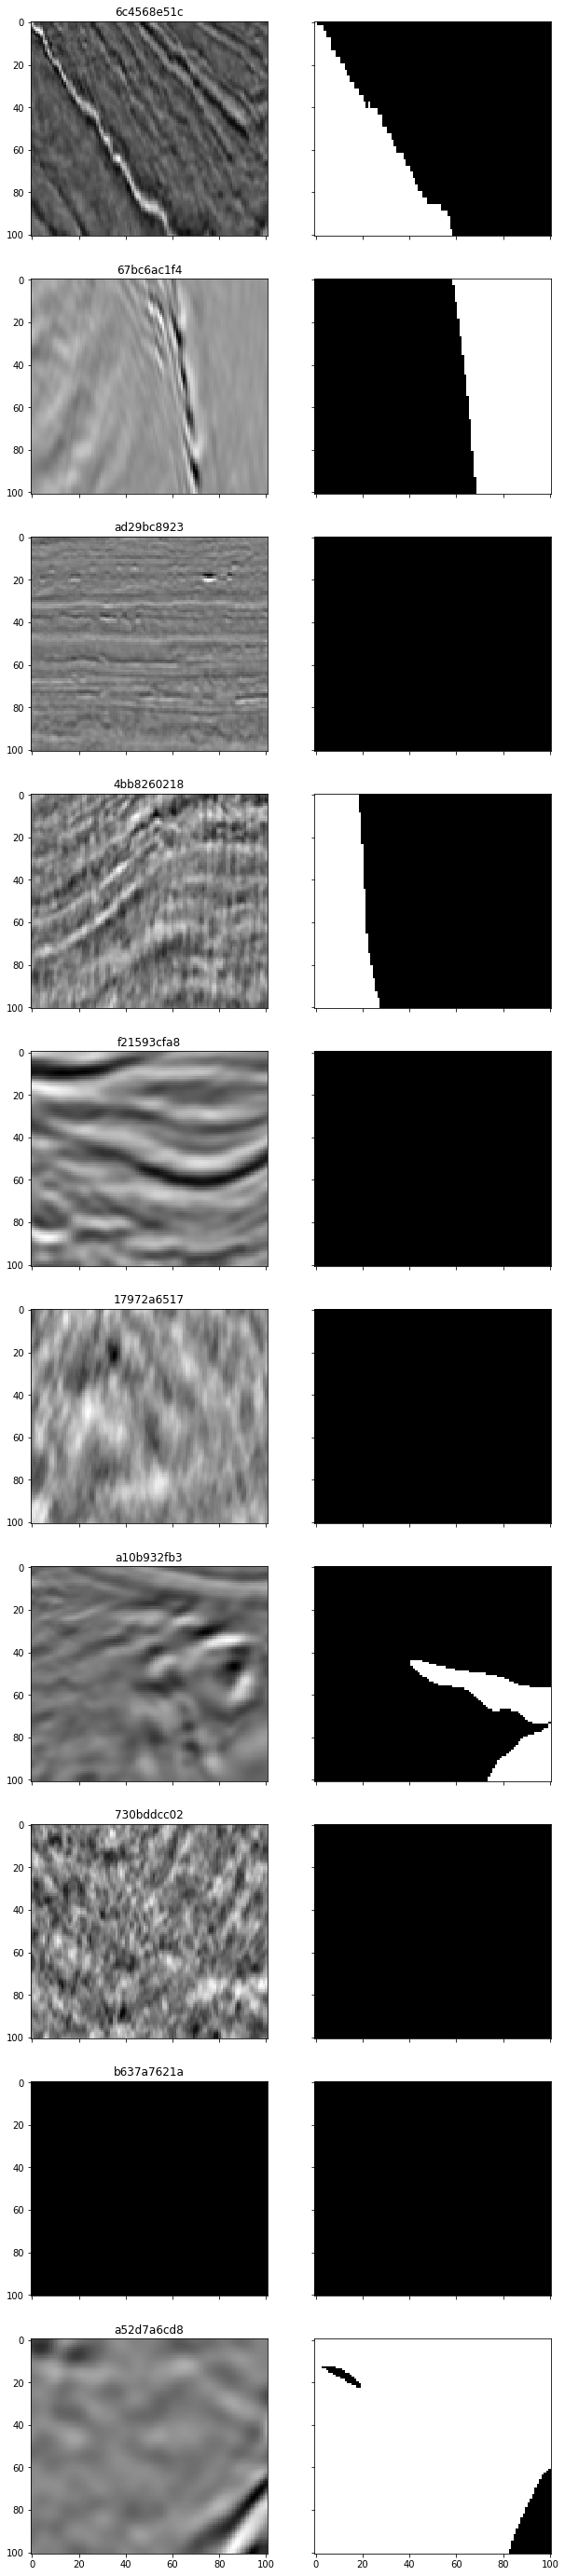

In [23]:
plot_images_and_masks(img_dict['id'], img_dict['img'], mask, count=10)